In [487]:
"short preprocessing"

# !pip install mne
# !pip install pyxdf
# !pip install PyWavelets
# !pip install pandas 
!pip install pyprep
!pip install numpy==1.21.6

from tqdm import tqdm
import pyxdf
import mne
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from copy import deepcopy
from matplotlib import pyplot
import matplotlib.pyplot as plt 
from mne.decoding import Scaler
import copy
import pathlib
from pathlib import Path
from typing import Dict, List, Optional, Union
from tqdm.auto import tqdm
# import plotly.graph_objects as go
# import plotly.subplots as sp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import argparse
from utils_clean import show_streams, find_stream, get_duration, get_time_series, set_channel_names, plot_channel_correlation,detect_bad_channels,plot_bads, ica_analysis,remove_breaks,build_class_epochs_mne,create_dataset,return_dataset,plot_topo,plot_eeg,plot_evoked,standartization

##ADDED:
import os
import mne
import numpy as np
import pickle
import pyprep
from pyprep.find_noisy_channels import NoisyChannels
from pyprep.prep_pipeline import PrepPipeline
import pandas as pd 
import argparse

import argparse


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numpy==1.21.6 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5,

In [488]:
# session_name = "S01"
# base_path = "/Users/arnavkapur/Desktop/EEG_Speech"
# data_path = os.path.join(base_path, "DATA","RAW")

# xdf_file_path = os.path.join(data_path, f"{session_name}.xdf")
xdf_file_path = "C:\\Users\\msi\\Desktop\\Constanze\\Docs\\DATA\\RAW\\S03.xdf"
# Load the .xdf file
data, header = pyxdf.load_xdf(xdf_file_path)
print(f"Successfully loaded data from {xdf_file_path}")

csv_file = "C:\\Users\\msi\\Desktop\\Constanze\\Docs\\DATA\\marker\\S03.csv"
df = pd.read_csv(csv_file, header=None)

2024-11-24 20:20:59,682 - pyxdf.pyxdf - INFO - Importing XDF file C:\Users\msi\Desktop\Constanze\Docs\DATA\RAW\S03.xdf...
2024-11-24 20:21:06,082 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2024-11-24 20:21:06,176 - pyxdf.pyxdf - INFO -   performing jitter removal...


Successfully loaded data from C:\Users\msi\Desktop\Constanze\Docs\DATA\RAW\S03.xdf


In [489]:
print(np.__version__)

2.1.3


In [490]:
sample_rate = 500

show_streams(data)
eeg_stream = find_stream('eeg', data)
marker_stream = find_stream('marker', data)
df_marker = get_time_series(marker_stream)
sfreq = float(eeg_stream["info"]["nominal_srate"][0])

channels_info = eeg_stream['info']['desc'][0]['channels'][0]['channel']

# # Extract labels from each channel
ch_names = [channel['label'][0] for channel in channels_info]
ch_names = ['Fpz', 'Fp1', 'Fp2', 'AF3', 'AF4', 'AF7', 'AF8', 'Fz', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FCz', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FT7', 'FT8', 'Cz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'T7', 'T8', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'TP7', 'TP8', 'Pz', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'POz', 'PO3', 'PO4', 'PO5', 'PO6', 'PO7', 'PO8', 'Oz', 'O1', 'O2', 'ECG', 'HEOR', 'HEOL', 'VEOU', 'VEOL']



"""Create MNE file raw containing the EEG Stream"""

eeg_data = eeg_stream["time_series"].T
eeg_data = eeg_data[:64]
print(eeg_data.shape)
sfreq = float(eeg_stream["info"]["nominal_srate"][0])

eeg_info = mne.create_info(64, sfreq, ["eeg"]*64)
raw = mne.io.RawArray(eeg_data, eeg_info)

# review information
ssp_projectors = raw.info["projs"]
raw.del_proj()
# Calculate the duration in seconds and convert to minutes
duration_minutes = (raw.n_times / raw.info['sfreq']) / 60

# Print the duration in minutes
print(f"Duration of the recording: {duration_minutes:.2f} minutes")
useless_channels = ['ECG', 'HEOR', 'HEOL', 'VEOU', 'VEOL']

#ADDED:
raw.resample(sample_rate)
raw.set_montage('standard_1020', on_missing='warn')   
set_channel_names(raw,ch_names)
raw.drop_channels(useless_channels)  
ch_names_new = ['Fpz', 'Fp1', 'Fp2', 'AF3', 'AF4', 'AF7', 'AF8', 'Fz', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FCz', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FT7', 'FT8', 'Cz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'T7', 'T8', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'TP7', 'TP8', 'Pz', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'POz', 'PO3', 'PO4', 'PO5', 'PO6', 'PO7', 'PO8', 'Oz', 'O1', 'O2']




Channel 0:
Effective Rate: 0
Start TimeStamp: 
Channel Name: ['79522685']
Channel Type: ['Markers']
Time Series Length: 0
--------------------
Channel 1:
Effective Rate: 0
Start TimeStamp: 
Channel Name: ['LSLTrigger']
Channel Type: ['Markers']
Time Series Shape: (1566, 1)
--------------------
Channel 2:
Effective Rate: 100.00000001161054
Start TimeStamp: 
Channel Name: ['E7240457_MEMsAll']
Channel Type: ['MEMsAll']
Time Series Shape: (486777, 9)
--------------------
Channel 3:
Effective Rate: 1000.0000000544462
Start TimeStamp: 
Channel Name: ['E7240457_EEG']
Channel Type: ['EEG']
Time Series Shape: (4867770, 64)
--------------------
(64, 4867770)
Creating RawArray with float64 data, n_channels=64, n_times=4867770
    Range : 0 ... 4867769 =      0.000 ...  4867.769 secs
Ready.
Duration of the recording: 81.13 minutes


C:\Users\msi\AppData\Local\Temp\ipykernel_15288\2869410118.py:39: RuntimeWarning: DigMontage is only a subset of info. There are 64 channel positions not present in the DigMontage. The channels missing from the montage are:

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63'].

Consider using inst.rename_channels to match the montage nomenclature, or inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw.set_montage('standard_1020', on_missing='warn')


New channel names: ['Fpz', 'Fp1', 'Fp2', 'AF3', 'AF4', 'AF7', 'AF8', 'Fz', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FCz', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FT7', 'FT8', 'Cz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'T7', 'T8', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'TP7', 'TP8', 'Pz', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'POz', 'PO3', 'PO4', 'PO5', 'PO6', 'PO7', 'PO8', 'Oz', 'O1', 'O2', 'ECG', 'HEOR', 'HEOL', 'VEOU', 'VEOL']


In [491]:
from pyprep.prep_pipeline import PrepPipeline

# # Define preprocessing parameters
# prep_params = {
#     "ref_chs": "eeg",
#     "reref_chs": "eeg",
#     "line_freqs": np.arange(60, sample_rate / 2, 60),
# }

# # Assign a valid montage (standard 10-20 system)
# montage = 'standard_1020'  # Use the name of the standard montage

# RANSAC = False
# print("Running pyprep")

# prep = PrepPipeline(
#     raw,
#     prep_params,
#     montage=montage,  # Pass the montage name
#     ransac=RANSAC
# )
# prep.fit()
# raw_new = prep.raw
# print("Preprocessing completed.")
# print("Still bad channels: ", raw_new.info['bads'])

# High-pass filter
raw.filter(l_freq=1, h_freq=None)


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


<RawArray | 59 x 2433885 (4867.8 s), ~1.07 GB, data loaded>

In [493]:



eeg_start = eeg_stream['time_stamps'][0]  # EEG start time, 679.891
marker_start = marker_stream['time_stamps'][0]  # Marker start time, 2311465.920826529

time_offset = eeg_stream['clock_times'][0] - data[1]['clock_times'][0]
aligned_marker_relative = [(ts + time_offset - marker_start + eeg_start) for ts in data[1]['time_stamps']]

aligned_pairs = []
for marker_time in aligned_marker_relative:
    closest_idx = np.argmin(np.abs(np.array(eeg_stream['time_stamps']) - marker_time))
    aligned_pairs.append((marker_time, eeg_stream['time_stamps'][closest_idx]))
df_marker = pd.DataFrame(marker_stream['time_series'], aligned_marker_relative,columns=['marker'])


In [494]:
# Extract the sentences column
sentences = df.iloc[2:, 0].values  # Ensure this is a numpy array or list for proper assignment
labels = df.iloc[2:, 1].values  # Ensure this is a numpy array or list for proper assignment

# Filter rows with marker == 1 and create a new column in df_marker
df_marker.loc[df_marker['marker'] == 1, 'sentences'] = sentences
df_marker.loc[df_marker['marker'] == 1, 'labels'] = labels
metadata = df_marker.loc[df_marker['marker'] == 1]
metadata = metadata.iloc[:-1]
metadata

,marker,sentences,labels
139.870064,1,I need to go to the store to pick up some groc...,1
154.612177,1,"Do you want a cup of coffee, or would you pref...",4
160.210045,1,"Can you help me with this project, or maybe sh...",0
165.593294,1,"Where did you put my keys, or did you see them...",2
170.741194,1,"I will be back in five minutes, so just wait h...",3
...,...,...,...
4984.460200,1,"Do you want a cup of coffee, or would you pref...",4
4990.957135,1,I need to go to the store to pick up some groc...,1
4995.774035,1,"Where did you put my keys, or did you see them...",2
5001.658277,1,"Do you want a cup of coffee, or would you pref...",4


In [496]:
labels = df.iloc[2:-1, 1]
labels 

2      1
3      4
4      0
5      2
6      3
      ..
779    4
780    1
781    2
782    4
783    3
Name: 1, Length: 782, dtype: object

In [517]:
split_datasets[0]['label']

0       1
1       1
2       1
3       1
4       1
       ..
2454    1
2455    1
2456    1
2457    1
2458    1
Name: label, Length: 2459, dtype: int64

In [508]:

dataset = []
df = pd.concat([pd.DataFrame({'time': eeg_timestamps, 'label': labels}), out], axis=1)
dataset.append(df)
dataset['label']


TypeError: list indices must be integers or slices, not str

In [535]:

sf = 500
eeg_time_series = raw.get_data()
eeg_time_series = eeg_time_series.T
eeg_timestamps = eeg_stream["time_stamps"]
event_time_series= marker_stream['time_series']
event_time_stamps= aligned_marker_relative

event_time_series_onset = df_marker[df_marker['marker'] == 1].reset_index()
event_time_series_offset = df_marker[df_marker['marker'] == 0].reset_index()
event_time_series_onset['numb'] = range(len(event_time_series_onset))
event_time_series_offset['numb'] = range(len(event_time_series_offset))
print("EVNETTIMESERIES", event_time_series_onset.shape)
print("EVENTTIMESERIESOFFSET", event_time_series_offset.shape)

eeg_closest_timestamps = []  

for event_time in event_time_stamps:
    closest_index = np.argmin(np.abs(eeg_timestamps - event_time))
    closest_timestamp = eeg_timestamps[closest_index]  
    eeg_closest_timestamps.append(closest_timestamp)


eeg_indeces = np.array(eeg_closest_timestamps)

labels = np.empty(eeg_timestamps.shape, dtype=int)
labels.fill(900) #Fill with 900 (break)
group_labels = np.copy(labels)
trials = np.copy(labels)

start = eeg_indeces[0]

eeg_data = eeg_time_series[:, :59]
out = pd.DataFrame(eeg_data, columns=ch_names_new)
print("OUT",out.shape)    


"Define the labels for the 5 sentences"

trial_label = df.iloc[2:-1, 1]
nan_count = trial_label.isna().sum()
trial_label = trial_label.dropna().astype(int)
print("Trial label shape", trial_label.shape)
print("Trial Labels:",trial_label)  

trial_label.index = range(len(trial_label))
event_time_series_offset['label'] = trial_label.astype(int)
event_time_series_offset = event_time_series_offset[:-1]
event_time_series_onset['label'] = trial_label.astype(int)  
event_time_series_onset = event_time_series_onset[:-1]


# Build the dataset
start_index = eeg_indeces[::2]
end_index = eeg_indeces[1::2]
start_index = start_index[:-1]
end_index = end_index[:-1]
print("START AND END", start_index.shape, end_index.shape, event_time_series_onset['label'].shape) #(461,) (461,) (461,)



durations = end_index - start_index
labels = np.full(len(eeg_timestamps), 900)

sf = sample_rate
for i in range(len(start_index)):
    start_idx = np.where(eeg_timestamps == start_index[i])[0]
    if len(start_idx) == 0:
        print(f"Start index {start_index[i]} not found in eeg_timestamps.")
        continue
    start_idx = start_idx[0]
        
    num_timestamps = int(durations[i] * sf)
    end_idx = min(start_idx + num_timestamps, len(eeg_timestamps))
    labels[start_idx:end_idx] = event_time_series_onset['label'][i]


# df = pd.DataFrame({'time': eeg_timestamps, 'label': labels})


dataset = []
df = pd.concat([pd.DataFrame({'time': eeg_timestamps, 'label': labels}), out], axis=1)
dataset.append(df)



def print_sample_distribution(labels):
    label_count = pd.Series(labels).value_counts().sort_index()

    print("Time sample distribution among different trials:")
    for label, count in label_count.items():
        print(f"Label {label}: {count} time samples")
        


label_count = df['label'].value_counts()
dataset[0]['label'].value_counts()

"Delete the breaks from the dataset"
#  using .query() to maintain the order of the columns removing th
dataset[0] = dataset[0].query("label != 900").reset_index(drop=True)

# using this to remove breaks without maining   the order of the columns
# dataset[0] = dataset[0].loc[dataset[0]['label'] != 900].reset_index(drop=True)
# dataset[0]['label'].value_counts()

# Split the dataset based on the durations into trials
split_datasets = []
start_idx = 0
d =dataset[0]    

for duration in durations:
    end_idx = start_idx + int(duration * sf)
    split_df = d.iloc[start_idx:end_idx].copy()
    split_datasets.append(split_df)
    start_idx = end_idx

# Padding data to max timestamp
max_duration = 0
longest_array = None

for dataset in split_datasets:
    duration = d['time'].iloc[-1] - d['time'].iloc[0]
    if duration > max_duration:
        max_duration = duration
        longest_array = dataset

print("MAX Duration", max_duration)

max_length = max([dataset.shape[0] for dataset in split_datasets])


EVNETTIMESERIES (783, 5)
EVENTTIMESERIESOFFSET (783, 5)
OUT (2433885, 59)
Trial label shape (4867767,)
Trial Labels: 2            1
3            1
4            1
5            1
6            1
          ... 
4867764    900
4867765    900
4867766    900
4867767    900
4867768    900
Name: label, Length: 4867767, dtype: int64
START AND END (782,) (782,) (782,)
MAX Duration 4864.2579997351595


In [556]:
for i, dataset in enumerate(split_datasets):
    first_label = int(split_datasets[0]['label'].iloc[0])    
    print(first_label)


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [557]:


padded_dataset = []

for dataset in split_datasets:
    num_samples_to_pad = max_length - dataset.shape[0]
    
    if num_samples_to_pad > 0:
        print("TES",dataset['label'])
        label = int(split_datasets[0]['label'].iloc[0])  # Retrieve the first row's label
        padding_df = pd.DataFrame(0, index=range(num_samples_to_pad), columns=dataset.columns)
        padding_df['label'] = label
        
        padded_dataset.append(pd.concat([dataset, padding_df], ignore_index=True))
    else:
        padded_dataset.append(dataset)

dataset_lengths = [dataset.shape[0] for dataset in padded_dataset]
print(f"Lengths after padding: {set(dataset_lengths)}")  
# for dataset in padded_dataset:
#     print(dataset['label'].value_counts())

dataset_lengths = [dataset.shape[0] for dataset in padded_dataset]

min_length = min(dataset_lengths)
max_length = max(dataset_lengths)

print(f"Minimum length: {min_length}")
print(f"Maximum length: {max_length}")

TES 0       1
1       1
2       1
3       1
4       1
       ..
2454    1
2455    1
2456    1
2457    1
2458    1
Name: label, Length: 2459, dtype: int64
TES 2459    1
2460    1
2461    1
2462    1
2463    1
       ..
4890    1
4891    1
4892    1
4893    1
4894    1
Name: label, Length: 2436, dtype: int64
TES 4895    1
4896    1
4897    1
4898    1
4899    1
       ..
7251    1
7252    1
7253    1
7254    1
7255    1
Name: label, Length: 2361, dtype: int64
TES 7256    1
7257    1
7258    1
7259    1
7260    1
       ..
9621    1
9622    1
9623    1
9624    1
9625    1
Name: label, Length: 2370, dtype: int64
TES 9626     1
9627     1
9628     1
9629     1
9630     1
        ..
12044    1
12045    1
12046    1
12047    1
12048    1
Name: label, Length: 2423, dtype: int64
TES 12049    1
12050    1
12051    1
12052    1
12053    1
        ..
14183    1
14184    1
14185    1
14186    1
14187    1
Name: label, Length: 2139, dtype: int64
TES 14188    1
14189    1
14190    1
14191    1
14192 

In [ ]:
event_time_series_onset

,index,marker,sentences,labels,numb,label
0,679.891112,1,"Do you want a cup of coffee, or would you pref...",4,0,4.0
1,689.691640,1,"Where did you put my keys, or did you see them...",2,1,2.0
2,696.343233,1,I need to go to the store to pick up some groc...,1,2,1.0
3,701.874266,1,"Can you help me with this project, or maybe sh...",0,3,0.0
4,708.573934,1,"I will be back in five minutes, so just wait h...",3,4,3.0
...,...,...,...,...,...,...
456,3893.043037,1,"Do you want a cup of coffee, or would you pref...",4,456,4.0
457,3898.277044,1,I need to go to the store to pick up some groc...,1,457,1.0
458,3936.526081,1,"I will be back in five minutes, so just wait h...",3,458,3.0
459,3964.427916,1,"Where did you put my keys, or did you see them...",2,459,2.0


In [ ]:
import numpy as np

# Assuming 'event_time_series_onset' contains 'index' for sample indices and 'label' for event labels

# Extract the first column as floatsastype(int)
first_column = np.round(event_time_series_onset['index'].values).astype(int)

# Create the second and third columns as integers
second_column = np.zeros(len(first_column), dtype=int)
third_column = event_time_series_onset['labels'].values.astype(int)

# Combine into a single array while preserving the data type
events = np.column_stack((first_column, second_column, third_column))

# Print the resulting array
print("Formatted Events Array with Mixed Types:")
print(events)


Formatted Events Array with Mixed Types:
[[ 680    0    4]
 [ 690    0    2]
 [ 696    0    1]
 ...
 [3937    0    3]
 [3964    0    2]
 [3971    0    2]]


In [ ]:
data = [df.iloc[:, -59:] for df in padded_dataset]
labels =  [df.iloc[:,1] for df in padded_dataset]
print(data)

[               Fpz           Fp1           Fp2           AF3           AF4  \
0     1.021405e-11  2.611245e-13 -1.713651e-11  8.281376e-12 -4.407141e-12   
1     3.556514e+00  7.359480e-01  3.119963e+00 -1.804504e+00  3.394752e+00   
2     3.480293e+00 -1.077880e+00  3.138516e+00 -8.406027e-01  4.274563e+00   
3     3.093663e+00 -9.392206e+00  3.225913e+00  1.224876e+00  5.646875e+00   
4     1.069129e+00 -3.802194e+00  3.003552e-01  3.466602e-01  1.865314e+00   
...            ...           ...           ...           ...           ...   
3593  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
3594  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
3595  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
3596  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
3597  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

               AF7           AF8            Fz            F1  

In [ ]:
import numpy as np

# Each DataFrame has shape (n_times, n_channels)
# Transpose each DataFrame and convert to NumPy
eeg_data_concat = np.concatenate([df.T for df in data], axis=1)  # Transpose and concatenate

# Verify the concatenated data shape
print(f"Shape of concatenated data for RawArray: {eeg_data_concat.shape}")  # (n_channels, n_times)

# eeg_data_list = [df.to_numpy().T for df in data]

# eeg_data = np.stack(eeg_data_list, axis=0)

# print(f"Shape of MNE-compatible data: {eeg_data.shape}")  # (n_epochs, n_channels, n_times)
info = mne.create_info(ch_names=ch_names_new, sfreq=500, ch_types="eeg")
# Create the RawArray
dataeeg = mne.io.RawArray(eeg_data_concat, info)

# Verify the created Raw object
tmax = max_duration/sample_rate +0.1



epochs = mne.Epochs( 
    raw=dataeeg, 
    events=events,
    tmin=0, 
    tmax= tmax, 
    baseline = None,
    metadata= metadata)

# Verify
print(epochs)


Shape of concatenated data for RawArray: (59, 1658678)
Creating RawArray with float64 data, n_channels=59, n_times=1658678
    Range : 0 ... 1658677 =      0.000 ...  3317.354 secs
Ready.
Adding metadata with 3 columns
461 matching events found
No baseline correction applied
0 projection items activated
<Epochs | 461 events (good & bad), 0 – 6.686 s (baseline off), ~48 kB, data not loaded, with metadata,
 '0': 92
 '1': 92
 '2': 93
 '3': 92
 '4': 92>


In [ ]:
d = dataeeg.get_data()
print(d.shape)  # Shape: (n_channels, n_samples)
d

(59, 1658678)


array([[ 1.02140518e-11,  3.55651438e+00,  3.48029291e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.61124455e-13,  7.35947968e-01, -1.07787983e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.71365144e-11,  3.11996341e+00,  3.13851578e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-5.48894263e-13,  2.98861686e-01,  1.68904673e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.66338121e-13,  2.94760059e+00,  7.50732914e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.55306878e-11, -9.20464890e-01,  3.26014454e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

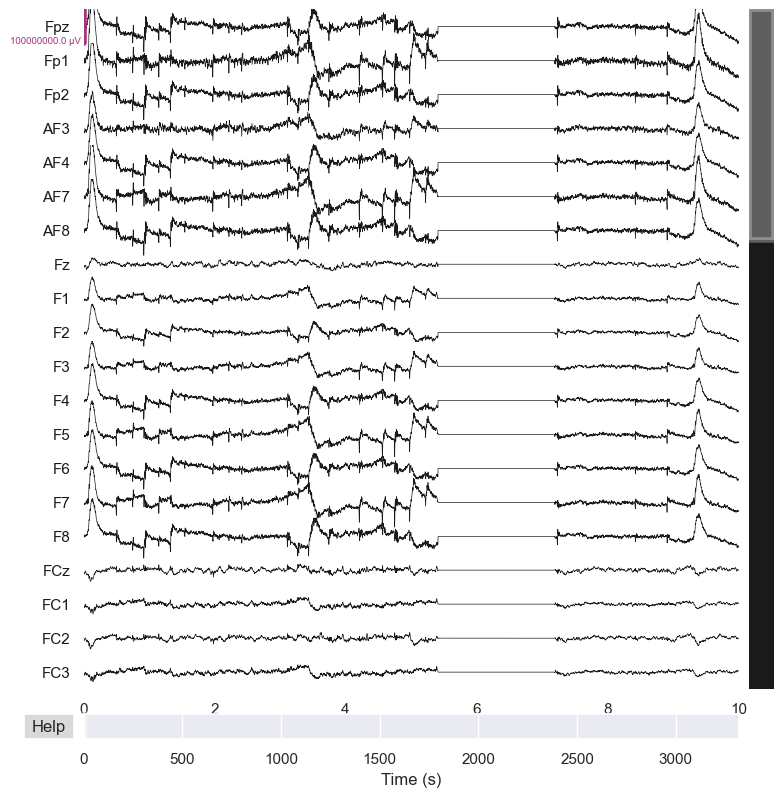

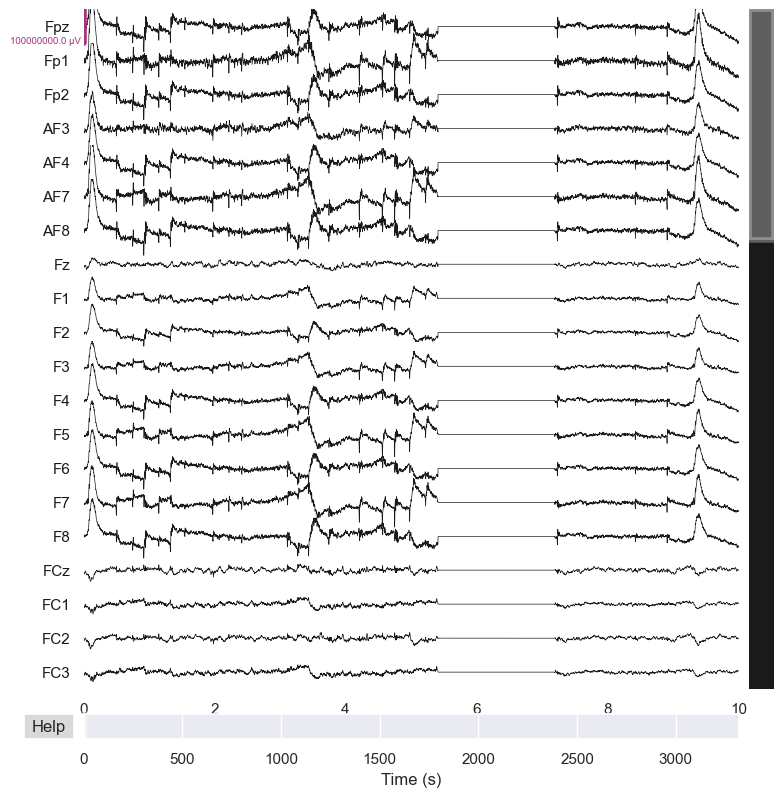

In [ ]:
dataeeg.plot(scalings = 50)

Using data from preloaded Raw for 20 events and 3344 original time points ...


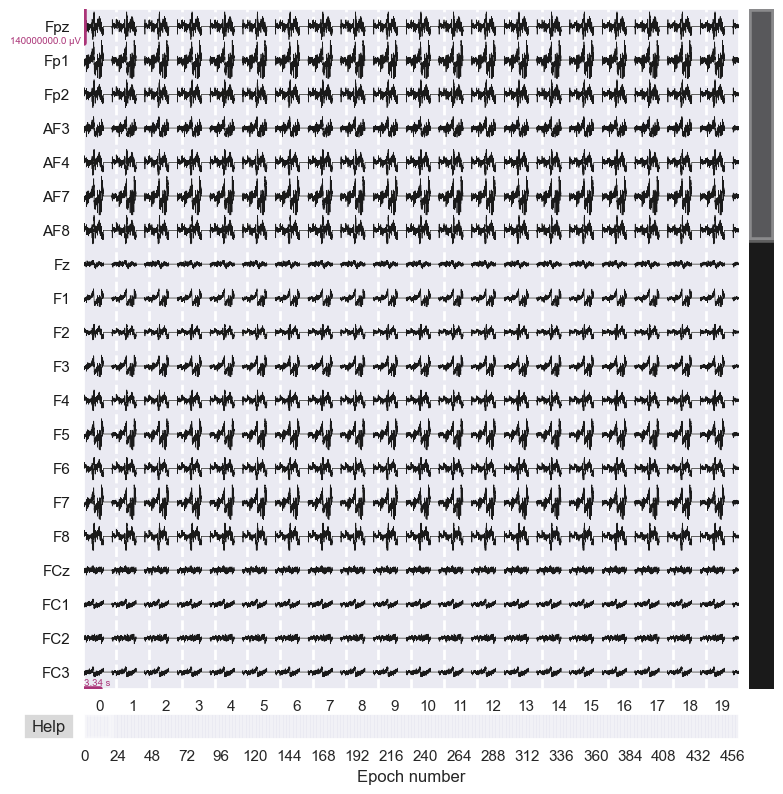

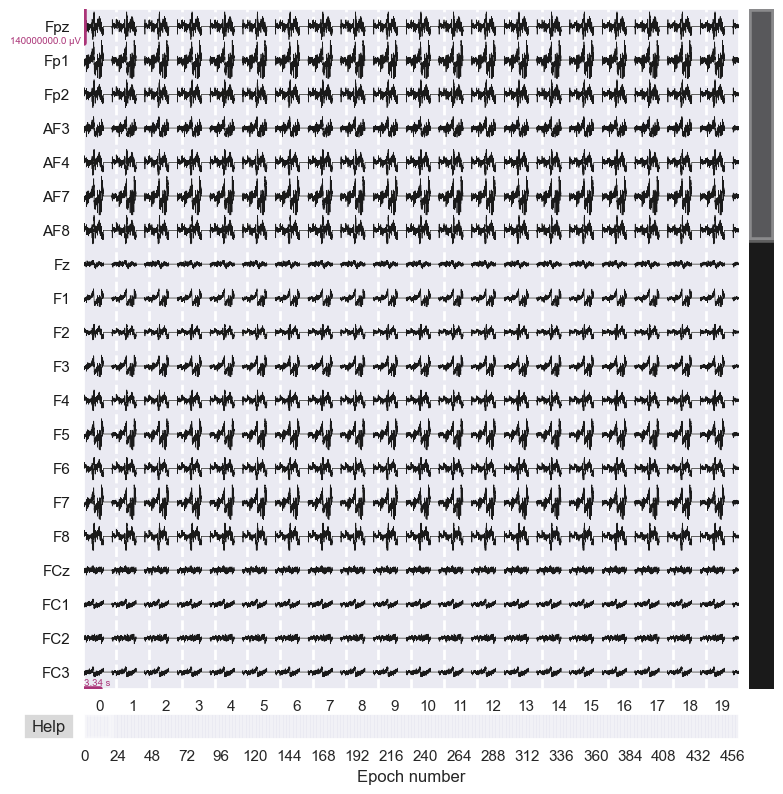

In [ ]:
epochs.plot( scalings = 70)

In [ ]:
# !pip install autoreject
# from autoreject import AutoReject
# ar = AutoReject()
# epochs_clean_r, reject_log_r = ar.fit_transform(epochs, return_log=True)
# # epochs_clean_i, reject_log_i = ar.fit_transform(epochs_i, return_log=True)
# # else:
# #     print("Not running autoreject")
# #     epochs_clean_r = epochs
# #     epochs_clean_i = epochs

In [ ]:
# !pip install mne_icalabel
# from mne_icalabel import label_components
# epochs_clean_r = epochs

# ica_r = mne.preprocessing.ICA(n_components=30, random_state=97, max_iter="auto",method='infomax', fit_params=dict(extended=True)) # 使用extended-infomax算法
# ica_r.fit(epochs_clean_r)
# ic_labels_r = label_components(epochs_clean_r, ica_r, method="iclabel")
# labels_r = ic_labels_r["labels"]
# exclude_idx_r = [
#     idx for idx, label in enumerate(labels_r) if label not in ["brain", "other"]
# ]
# print(f"Reading Epochs Excluding these ICA components: {exclude_idx_r}")
# epochs_clean_r_reconstructed = epochs_clean_r.copy()
# ica_r.apply(epochs_clean_r_reconstructed, exclude=exclude_idx_r)

# # ica_i = mne.preprocessing.ICA(n_components=30, random_state=97, max_iter="auto",method='infomax', fit_params=dict(extended=True))
# # ica_i.fit(epochs_clean_i)
# # ic_labels_i = label_components(epochs_clean_i, ica_i, method="iclabel")
# # labels_i = ic_labels_i["labels"]
# # exclude_idx_i = [
# #     idx for idx, label in enumerate(labels_i) if label not in ["brain", "other"]
# # # ]
# # # print(f"Imagine Epochs Excluding these ICA components: {exclude_idx_i}")
# # epochs_clean_i_reconstructed = epochs_clean_i.copy()
# # ica_i.apply(epochs_clean_i_reconstructed, exclude=exclude_idx_i)


In [ ]:
epochs

<Epochs | 461 events (good & bad), 0 – 6.686 s (baseline off), ~48 kB, data not loaded, with metadata,
 '0': 92
 '1': 92
 '2': 93
 '3': 92
 '4': 92>

In [ ]:
import os
import pickle

# file_path = "C:\\Users\\msi\\Desktop\\Constanze\\Docs\\DATA\\PREPROCESSED\\PREP_CH\\data.pkl"
data_to_save = []
for epoch_idx in range(len(epochs)):
    # Extract sentence (or None if metadata is unavailable)
    sentence = (
        epochs.metadata.iloc[epoch_idx]['sentences'] 
        if epochs.metadata is not None else None
    )
    data = epochs[epoch_idx].get_data(copy=False)
    print(f"Epoch {epoch_idx} data shape: {data.shape}")
    data_to_save.append({"text": sentence, "input_features": data})

# with open(file_path, 'wb') as file:
#     pickle.dump(data_to_save, file)

# print(f"Data successfully saved to {file_path}")


Using data from preloaded Raw for 1 events and 3344 original time points ...
Epoch 0 data shape: (1, 59, 3344)
Using data from preloaded Raw for 1 events and 3344 original time points ...
Epoch 1 data shape: (1, 59, 3344)
Using data from preloaded Raw for 1 events and 3344 original time points ...
Epoch 2 data shape: (1, 59, 3344)
Using data from preloaded Raw for 1 events and 3344 original time points ...
Epoch 3 data shape: (1, 59, 3344)
Using data from preloaded Raw for 1 events and 3344 original time points ...
Epoch 4 data shape: (1, 59, 3344)
Using data from preloaded Raw for 1 events and 3344 original time points ...
Epoch 5 data shape: (1, 59, 3344)
Using data from preloaded Raw for 1 events and 3344 original time points ...
Epoch 6 data shape: (1, 59, 3344)
Using data from preloaded Raw for 1 events and 3344 original time points ...
Epoch 7 data shape: (1, 59, 3344)
Using data from preloaded Raw for 1 events and 3344 original time points ...
Epoch 8 data shape: (1, 59, 3344)
U

In [ ]:
# import pickle
# # import torch
# import numpy 

# def load_preprocessed_data(file_path: str):
#     """
#     Loads preprocessed data from the given pickle file.
#     Adjusts shapes and data types as needed for downstream processing.
#     """
#     if not os.path.exists(file_path):
#         raise FileNotFoundError(f"File not found at {file_path}")
    
#     # Load the preprocessed data
#     with open(file_path, "rb") as file:
#         data = pickle.load(file)
#         print( len(data))



#     dsplit = {"input_features": [], "labels": []}
#     for idx, trial in enumerate(data):
#         # Extract `text` and `input_features`
#         text = trial["text"]
#         # input_features = trial["input_features"]
#         input_features = trial['input_features'][0, :59, :]*1000000
#         mean = numpy.absolute(numpy.mean(input_features, axis=1))
#         stds = numpy.std(input_features, axis=1)
#         # Ensure `input_features` is a numpy array and has the correct shape
#         if not isinstance(input_features, np.ndarray):
#             input_features = np.array(input_features)

#         # Check the expected shape of input_features (adjust based on your saving format)
#         # Your shape: (1, 59, 501) -> Remove the first dimension
#         assert input_features.shape[0] == 1, f"Unexpected shape: {input_features.shape}"
#         input_features = input_features[0]

#         # Convert to float32 for compatibility
#         input_features = np.float32(input_features)
#         # input_features = torch.tensor(input_features)

#         # Add to the dataset
#         dsplit["input_features"].append(input_features)
#         dsplit["labels"].append(text)

#     print(f"Loaded {len(dsplit['input_features'])} trials from {file_path}")
#     return dsplit

# def get_dataset_from_path(file_path: str):
#     """
#     Wrapper for loading dataset.
#     """
#     return load_preprocessed_data(file_path)

# # Example Usage
# file_path = "C:\\Users\\msi\\Desktop\\Constanze\\Docs\\DATA\\PREPROCESSED\\PREP_CH\\data.pkl"
# dataset = get_dataset_from_path(file_path)

# # Check dataset structure
# print(f"Number of trials: {len(dataset['input_features'])}")
# print(f"Shape of first trial: {dataset['input_features'][0].shape}")
# print(f"First label: {dataset['labels'][0]}")


In [ ]:
# import torch
# Load the preprocessed data
import numpy

# paths = "C:\\Users\\msi\\Desktop\\Constanze\\Docs\\DATA\\sub-01_task-imagine_run-011_eeg.pkl"
paths = "C:\\Users\\msi\\Desktop\\Constanze\\Docs\\DATA\\PREPROCESSED\\PREP_CH\\data.pkl"

def get_imagine(sub: str, epoch: int):
    with open(paths, "rb") as file:
            data = pickle.load(file)
            print( len(data))
    
    # data = data.astype('float64')
    pickles = data
    
    
    for idx, trial in enumerate(pickles):
        assert isinstance(trial['input_features'], numpy.ndarray)
        assert trial['input_features'].dtype == numpy.float64
        assert trial['input_features'].shape == (1, 59, 3344)
        input_features = trial['input_features'][0, :59, :]#*1000000
        mean = np.absolute(np.mean(input_features, axis=1))
        stds = np.std(input_features, axis=1)
        assert isinstance(input_features, numpy.ndarray)
        assert input_features.dtype == numpy.float64
        assert input_features.shape == (59, 3344)
        # assert (mean > 0).all() and (mean < 10000).all()
        # assert (stds > 0).all() and (stds < 10000).all()
    return pickles

    # for idx, trial in enumerate(pickles):
    #     assert isinstance(trial['input_features'], numpy.ndarray)
    #     assert trial['input_features'].dtype == numpy.float64
    #     assert trial['input_features'].shape == (1, 125, 1651)
    #     input_features = trial['input_features'][0, :122, :]*1000000
    #     mean = numpy.absolute(numpy.mean(input_features, axis=1))
    #     stds = numpy.std(input_features, axis=1)
    #     assert isinstance(input_features, numpy.ndarray)
    #     assert input_features.dtype == numpy.float64
    #     assert input_features.shape == (122, 1651)
    #     assert (mean > 0).all() and (mean < 10000).all()
    #     assert (stds > 0).all() and (stds < 10000).all()
    # return pickles

def get_dataset(sub: str):
    dsplit = {"input_features": [], "labels": []}
    for epoch in range(1, 46): ## CHECK WHY 46
        pickles = get_imagine(sub, epoch)  ## CHANGE: Added the call to `get_imagine` to fetch data for each epoch.
        for trial in pickles:
            input_features = trial['input_features'][0, :59, :]#*1000000
            input_ids = trial['text'].strip()
            input_features = np.float32(input_features)
            # input_features = torch.tensor(input_features)
            dsplit["input_features"].append(input_features)
            dsplit["labels"].append(input_ids)
    return dsplit




In [ ]:
print(len(data_to_save[0]['input_features'][0][0]
))
data_to_save[0]['input_features'][0][0]



3344


array([ 3.98800560e+01,  3.88532688e+01,  2.93462636e+01, ...,
       -3.43118571e-02,  7.43129751e-01,  4.63083448e+00])

In [ ]:
print(len(data['input_features'][0][0]))
data['input_features'][0][0]

3344


array([39.880054 , 38.853268 , 29.346264 , ...,  0.7431298,  4.6308346,
        5.1795564], dtype=float32)

In [ ]:
event_id_1_count = np.sum(events[:, 2] == 1)
event_id_1_count
print(epochs.drop_log)  # See why trials were excluded
print(epochs.event_id)
print(epochs.metadata)  # Check the metadata for all epochs
unique_events, counts = np.unique(events[:, 2], return_counts=True)
print(f"Event counts: {dict(zip(unique_events, counts))}")


((), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (),

In [ ]:
subject = "sub-01"
data = get_dataset(subject)
inputs = data["input_features"]
labels = data["labels"]


461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461


In [592]:
session = "S01"
json_path = f"C:\\Users\\msi\\Desktop\\Constanze\\Docs\\DATA\\marker\\textmaps\\{session}.json"


def get_imagine(sub: str):
    paths = f"C:\\Users\\msi\\Desktop\\Constanze\\Docs\\DATA\\PREPROCESSED\\PREP_CH\\{session}\\data.pkl"

    with open(paths, "rb") as file:
            data = pickle.load(file)
            print( len(data))
    pickles = data
    
    for idx, trial in enumerate(pickles):
        input_features = trial['input_features'][0, :59, :]#*1000000
        mean = np.absolute(np.mean(input_features, axis=1))
        stds = np.std(input_features, axis=1)
    return pickles


def get_dataset(sub: str):
    dsplit = {"input_features": [], "labels": []}
    pickles = get_imagine(sub)  ## CHANGE: Added the call to `get_imagine` to fetch data for each epoch.
    for trial in pickles:
        input_features = trial['input_features'][0, :59, :]#*1000000
        input_ids = trial['text'].strip()
        input_features = np.float32(input_features)
        # input_features = torch.tensor(input_features)
        dsplit["input_features"].append(input_features)
        dsplit["labels"].append(input_ids)
    return dsplit


data = get_dataset("s")

import json


# Ensure JSON file exists
assert os.path.exists(json_path), f"JSON file not found at {json_path}"

with open(json_path, "r") as file:
    textmaps_data = json.load(file)
    print("JSON data loaded successfully:", textmaps_data)
sentences = data['labels']
mapped_labels = [textmaps_data[sentence] for sentence in sentences]

for i, (sentence, label) in enumerate(zip(sentences, mapped_labels)):
    print(f"Mapped Label: {label}")


stacked_array = np.stack(data['input_features'])  # Shape: (781, 59, 4915)
print(f"Stacked array shape: {stacked_array.shape}")
stacked_array

base_path = "C:\\Users\\msi\\Desktop\\Constanze\\Docs\\DATA\\PREPROCESSED\\PREP_CH\\EEGNET"
session_path = os.path.join(base_path, session)

# Ensure the session folder exists
if not os.path.exists(session_path):
    os.makedirs(session_path)
    print(f"Created directory: {session_path}")
    
file_path = os.path.join(base_path,session,"data.npy")
np.save(file_path,stacked_array)
label_path = os.path.join(base_path,session,"label.npy")
np.save(file_path,mapped_labels)


461
JSON data loaded successfully: {'Do you want a cup of coffee, or would you prefer some tea instead?': 4, 'Where did you put my keys, or did you see them anywhere around the house?': 2, 'I need to go to the store to pick up some groceries for tonight.': 1, 'Can you help me with this project, or maybe show me where to start?': 0, 'I will be back in five minutes, so just wait here until I return': 3}
Mapped Label: 4
Mapped Label: 2
Mapped Label: 1
Mapped Label: 0
Mapped Label: 3
Mapped Label: 3
Mapped Label: 4
Mapped Label: 1
Mapped Label: 0
Mapped Label: 2
Mapped Label: 2
Mapped Label: 1
Mapped Label: 4
Mapped Label: 3
Mapped Label: 0
Mapped Label: 2
Mapped Label: 4
Mapped Label: 0
Mapped Label: 3
Mapped Label: 1
Mapped Label: 0
Mapped Label: 2
Mapped Label: 3
Mapped Label: 4
Mapped Label: 1
Mapped Label: 0
Mapped Label: 3
Mapped Label: 1
Mapped Label: 4
Mapped Label: 2
Mapped Label: 0
Mapped Label: 4
Mapped Label: 1
Mapped Label: 3
Mapped Label: 2
Mapped Label: 1
Mapped Label: 2
Map